# Equation of Time, Discontinuities, and Two Signals

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import pandas as pd

import pywt

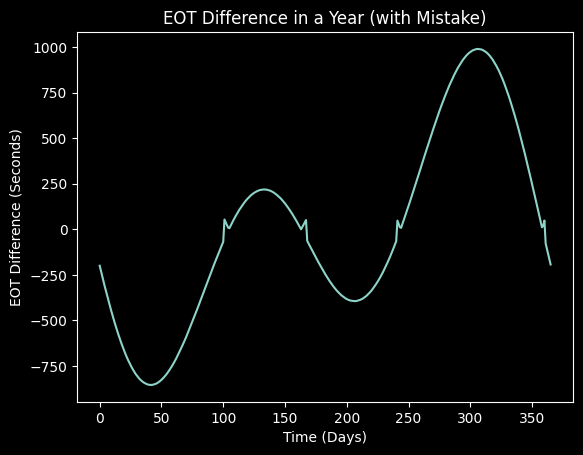

In [19]:
# Discontinuity in a signal
eot_data = np.genfromtxt("data/ppowers_discontinuity.csv", skip_header=1, delimiter=',')
eot_data = eot_data[:,1]
time_range = (np.arange(0, len(eot_data)))
eot_df = pd.DataFrame({'time (days)': time_range, 'eot difference (seconds)': eot_data})
eot_df.head(102)

# Plot data
plt.style.use('dark_background')
fig, ax = plt.subplots()
fig = plt.plot(eot_df["time (days)"], eot_df["eot difference (seconds)"])
plt.title("EOT Difference in a Year (with Mistake)")
plt.xlabel("Time (Days)")
plt.ylabel("EOT Difference (Seconds)")
plt.show()

size (19, 366) with 19 scales and 366 time steps
x-axis be default is: 366
y-axis be default is: 19


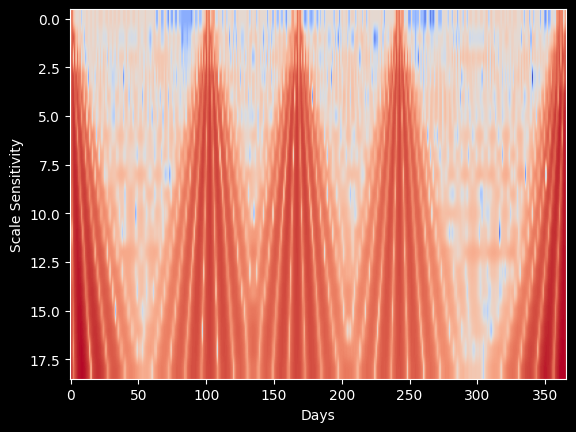

In [20]:
wavelet_mother = "morl"

# scale determines how squished or stretched a wavelet is
scales = np.arange(1, 20)
wavelet_coeffs, freqs = pywt.cwt(eot_data, scales, wavelet = wavelet_mother)

# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis be default is: {wavelet_coeffs.shape[0]}")

# change y-axis to period or frequencies
# Plot
plt.style.use('dark_background')
data = np.log2(abs(wavelet_coeffs)) # compare the magntiude
plt.xlabel("Days")
plt.ylabel("Scale Sensitivity")
plt.imshow(data, 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.show()

In [24]:
# Corrected Data

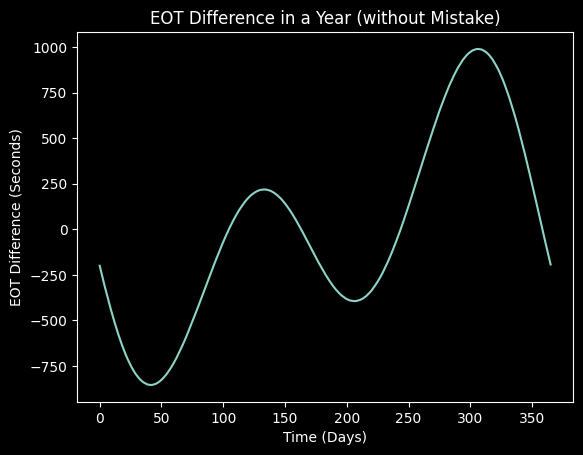

In [21]:
eot_data = np.genfromtxt("data/ppowers_csv.csv", skip_header=1, delimiter=',')
eot_data = eot_data[:,1]
time_range = (np.arange(0, len(eot_data)))
eot_df = pd.DataFrame({'time (days)': time_range, 'eot difference (seconds)': eot_data})

# Plot data
plt.style.use('dark_background')
fig, ax = plt.subplots()
fig = plt.plot(eot_df["time (days)"], eot_df["eot difference (seconds)"])
plt.title("EOT Difference in a Year (without Mistake)")
plt.xlabel("Time (Days)")
plt.ylabel("EOT Difference (Seconds)")
plt.show()

size (19, 366) with 19 scales and 366 time steps
x-axis be default is: 366
y-axis be default is: 19


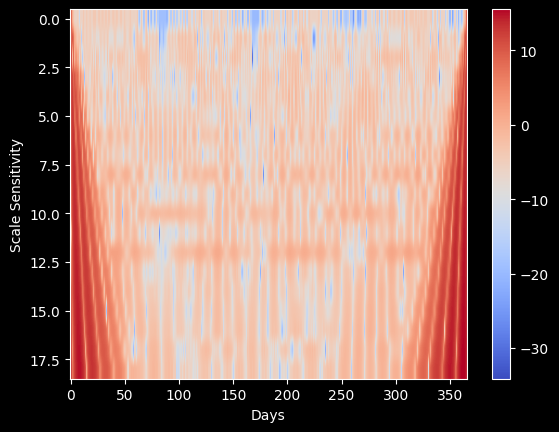

In [22]:
# scale determines how squished or stretched a wavelet is
scales = np.arange(1, 20)
wavelet_coeffs, freqs = pywt.cwt(eot_data, scales, wavelet = wavelet_mother)

# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis be default is: {wavelet_coeffs.shape[0]}")

# Plot scalogram
# TODO: filter out lower values
# y-axis plot the period (period = 1 / freqs)
# frequency2scale and scale2frequency
fig, ax = plt.subplots()
plt.style.use('dark_background')
data = np.log2(np.square(abs(wavelet_coeffs))) # power plot
plt.xlabel("Days")
plt.ylabel("Scale Sensitivity")
#ax.set_yscale("log", base=2)
plt.imshow(data, 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.show()

In [ ]:
# Frequencies of the obliquity and eccentricity

In [36]:
# 2 plots:
# Wavelet_coeff is a complex numbre with a real and an imaginary number (1 + 2i)
# plot real componenet of the complex number: np.log2(abs(wavelet_coeffs)) - > to plot the magntiude
# plot power: abs(wavelet_coeffs) ** 2
# power plot: np.log2(np.square(abs(wavelet_coeffs)))
# second plot:
# phase: uses the imaginary number of the wavelet_coeffiencts
# tan-1(imaginary/abs(wavelet_coeffs))

# red noise: the future depends on the past (point has no information about the past, but does depend on the previous step)


#plot with fourier transofrm
# period, wavelength, frequency
# plot two sine waves (perfect sines waves)

array([1, 4, 9])